# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

# importing data 

In [2]:
train= pd.read_csv('Price_train.csv')
test= pd.read_csv('Price_test.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_open= train.iloc[:, 1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [6]:
train_open_scaled[60]

array([0.08627874])

In [7]:
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [8]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [9]:
xtrain.shape

(1198, 60, 1)

# building LSTM 

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
#initialisizng the model 
regression= Sequential()
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))
# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))
#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))
#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))
#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')
#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
40/40 [==============================] - 25s 127ms/step - loss: 0.0340
Epoch 2/100
40/40 [==============================] - 5s 126ms/step - loss: 0.0065
Epoch 3/100
40/40 [==============================] - 5s 121ms/step - loss: 0.0059
Epoch 4/100
40/40 [==============================] - 5s 120ms/step - loss: 0.0054
Epoch 5/100
40/40 [==============================] - 5s 121ms/step - loss: 0.0049
Epoch 6/100
40/40 [==============================] - 5s 133ms/step - loss: 0.0055
Epoch 7/100
40/40 [==============================] - 5s 118ms/step - loss: 0.0050
Epoch 8/100
40/40 [==============================] - 5s 116ms/step - loss: 0.0049
Epoch 9/100
40/40 [==============================] - 5s 134ms/step - loss: 0.0048
Epoch 10/100
40/40 [==============================] - 5s 116ms/step - loss: 0.0042
Epoch 11/100
40/40 [==============================] - 5s 115ms/step - loss: 0.0040
Epoch 12/100
40/40 [==============================] - 5s 134ms/step - loss: 0.0041
Epoch 13/100

40/40 [==============================] - 5s 126ms/step - loss: 0.0015
Epoch 100/100
40/40 [==============================] - 5s 127ms/step - loss: 0.0014


# predicting for test data 

In [12]:
test_open= test.iloc[:, 1:2].values 
total= pd.concat([train['Open'],test['Open']],axis=0)
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) 
test_input= ss.transform(test_input)

In [13]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) 

In [14]:
xtest= np.array(xtest)

In [15]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

1/1 [==============================] - 4s 4s/step


In [16]:
predicted_value= ss.inverse_transform(predicted_value)

# plotting the data 

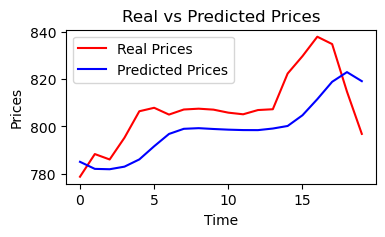

In [17]:
plt.figure(figsize=(4,2))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=10)

In [18]:
from keras.wrappers.scikit_learn import KerasRegressor

In [19]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

C:\Users\AKSHAYA SHREE\AppData\Local\Temp\ipykernel_992\2440103601.py:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasRegressor(build_fn=reg)


In [20]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/50
20/20 [==============================] - 19s 154ms/step - loss: 0.0688
Epoch 2/50
20/20 [==============================] - 3s 164ms/step - loss: 0.0145
Epoch 3/50
20/20 [==============================] - 3s 143ms/step - loss: 0.0069
Epoch 4/50
20/20 [==============================] - 3s 142ms/step - loss: 0.0064
Epoch 5/50
20/20 [==============================] - 3s 142ms/step - loss: 0.0064
Epoch 6/50
20/20 [==============================] - 3s 157ms/step - loss: 0.0057
Epoch 7/50
20/20 [==============================] - 3s 169ms/step - loss: 0.0061
Epoch 8/50
20/20 [==============================] - 3s 149ms/step - loss: 0.0056
Epoch 9/50
20/20 [==============================] - 3s 141ms/step - loss: 0.0055
Epoch 10/50
20/20 [==============================] - 3s 144ms/step - loss: 0.0050
Epoch 11/50
20/20 [==============================] - 3s 149ms/step - loss: 0.0055
Epoch 12/50
20/20 [==============================] - 3s 165ms/step - loss: 0.0051
Epoch 13/50
20/20 [=====

5/5 [==============================] - 4s 46ms/step - loss: 0.0014
Epoch 1/50
20/20 [==============================] - 20s 169ms/step - loss: 0.0665
Epoch 2/50
20/20 [==============================] - 3s 169ms/step - loss: 0.0123
Epoch 3/50
20/20 [==============================] - 3s 143ms/step - loss: 0.0082
Epoch 4/50
20/20 [==============================] - 3s 170ms/step - loss: 0.0062
Epoch 5/50
20/20 [==============================] - 3s 165ms/step - loss: 0.0050
Epoch 6/50
20/20 [==============================] - 3s 150ms/step - loss: 0.0054
Epoch 7/50
20/20 [==============================] - 3s 143ms/step - loss: 0.0053
Epoch 8/50
20/20 [==============================] - 3s 147ms/step - loss: 0.0051
Epoch 9/50
20/20 [==============================] - 3s 155ms/step - loss: 0.0047
Epoch 10/50
20/20 [==============================] - 3s 167ms/step - loss: 0.0049
Epoch 11/50
20/20 [==============================] - 3s 157ms/step - loss: 0.0049
Epoch 12/50
20/20 [====================

20/20 [==============================] - 3s 146ms/step - loss: 0.0029
Epoch 49/50
20/20 [==============================] - 3s 167ms/step - loss: 0.0029
Epoch 50/50
5/5 [==============================] - 4s 49ms/step - loss: 0.0040
Epoch 1/50
20/20 [==============================] - 20s 145ms/step - loss: 0.0383
Epoch 2/50
20/20 [==============================] - 3s 168ms/step - loss: 0.0077
Epoch 3/50
20/20 [==============================] - 3s 156ms/step - loss: 0.0050
Epoch 4/50
20/20 [==============================] - 3s 145ms/step - loss: 0.0045
Epoch 5/50
20/20 [==============================] - 3s 143ms/step - loss: 0.0053
Epoch 6/50
20/20 [==============================] - 3s 154ms/step - loss: 0.0041
Epoch 7/50
20/20 [==============================] - 4s 178ms/step - loss: 0.0044
Epoch 8/50
20/20 [==============================] - 3s 160ms/step - loss: 0.0036
Epoch 9/50
20/20 [==============================] - 3s 143ms/step - loss: 0.0037
Epoch 10/50
20/20 [====================

30/30 [==============================] - 4s 133ms/step - loss: 0.2703
Epoch 21/25
30/30 [==============================] - 4s 136ms/step - loss: 0.2665
Epoch 22/25
30/30 [==============================] - 4s 120ms/step - loss: 0.2563
Epoch 23/25
30/30 [==============================] - 4s 120ms/step - loss: 0.2529
Epoch 24/25
30/30 [==============================] - 4s 134ms/step - loss: 0.2477
Epoch 25/25
8/8 [==============================] - 5s 34ms/step - loss: 0.0851
Epoch 1/25
30/30 [==============================] - 21s 136ms/step - loss: 0.3873
Epoch 2/25
30/30 [==============================] - 4s 139ms/step - loss: 0.3817
Epoch 3/25
30/30 [==============================] - 4s 118ms/step - loss: 0.3798
Epoch 4/25
30/30 [==============================] - 4s 118ms/step - loss: 0.3771
Epoch 5/25
30/30 [==============================] - 4s 133ms/step - loss: 0.3734
Epoch 6/25
30/30 [==============================] - 4s 140ms/step - loss: 0.3682
Epoch 7/25
30/30 [==================

30/30 [==============================] - 4s 126ms/step - loss: 0.0059
Epoch 18/25
30/30 [==============================] - 4s 120ms/step - loss: 0.0061
Epoch 19/25
30/30 [==============================] - 4s 124ms/step - loss: 0.0060
Epoch 20/25
30/30 [==============================] - 4s 143ms/step - loss: 0.0058
Epoch 21/25
30/30 [==============================] - 4s 129ms/step - loss: 0.0060
Epoch 22/25
30/30 [==============================] - 4s 120ms/step - loss: 0.0059
Epoch 23/25
30/30 [==============================] - 4s 121ms/step - loss: 0.0057
Epoch 24/25
30/30 [==============================] - 4s 140ms/step - loss: 0.0054
Epoch 25/25
8/8 [==============================] - 5s 38ms/step - loss: 0.0017
Epoch 1/25
30/30 [==============================] - 21s 144ms/step - loss: 0.1314
Epoch 2/25
30/30 [==============================] - 4s 130ms/step - loss: 0.0719
Epoch 3/25
30/30 [==============================] - 4s 122ms/step - loss: 0.0635
Epoch 4/25
30/30 [===============

30/30 [==============================] - 4s 142ms/step - loss: 0.0070
Epoch 15/25
30/30 [==============================] - 4s 133ms/step - loss: 0.0058
Epoch 16/25
30/30 [==============================] - 4s 126ms/step - loss: 0.0055
Epoch 17/25
30/30 [==============================] - 7s 233ms/step - loss: 0.0053
Epoch 18/25
30/30 [==============================] - 6s 191ms/step - loss: 0.0048
Epoch 19/25
30/30 [==============================] - 4s 125ms/step - loss: 0.0048
Epoch 20/25
30/30 [==============================] - 4s 126ms/step - loss: 0.0047
Epoch 21/25
30/30 [==============================] - 4s 145ms/step - loss: 0.0049
Epoch 22/25
30/30 [==============================] - 4s 132ms/step - loss: 0.0045
Epoch 23/25
30/30 [==============================] - 4s 123ms/step - loss: 0.0043
Epoch 24/25
30/30 [==============================] - 4s 121ms/step - loss: 0.0047
Epoch 25/25
8/8 [==============================] - 4s 36ms/step - loss: 0.0052
Epoch 1/50
20/20 [=============

20/20 [==============================] - 3s 169ms/step - loss: 0.0057
Epoch 38/50
20/20 [==============================] - 3s 145ms/step - loss: 0.0055
Epoch 39/50
20/20 [==============================] - 3s 147ms/step - loss: 0.0051
Epoch 40/50
20/20 [==============================] - 3s 146ms/step - loss: 0.0057
Epoch 41/50
20/20 [==============================] - 3s 168ms/step - loss: 0.0053
Epoch 42/50
20/20 [==============================] - 3s 171ms/step - loss: 0.0056
Epoch 43/50
20/20 [==============================] - 3s 150ms/step - loss: 0.0056
Epoch 44/50
20/20 [==============================] - 3s 146ms/step - loss: 0.0054
Epoch 45/50
20/20 [==============================] - 3s 147ms/step - loss: 0.0054
Epoch 46/50
20/20 [==============================] - 3s 164ms/step - loss: 0.0054
Epoch 47/50
20/20 [==============================] - 3s 169ms/step - loss: 0.0055
Epoch 48/50
20/20 [==============================] - 3s 154ms/step - loss: 0.0052
Epoch 49/50
20/20 [=========

20/20 [==============================] - 3s 163ms/step - loss: 0.0043
Epoch 36/50
20/20 [==============================] - 3s 146ms/step - loss: 0.0046
Epoch 37/50
20/20 [==============================] - 3s 146ms/step - loss: 0.0043
Epoch 38/50
20/20 [==============================] - 3s 148ms/step - loss: 0.0047
Epoch 39/50
20/20 [==============================] - 3s 170ms/step - loss: 0.0047
Epoch 40/50
20/20 [==============================] - 3s 165ms/step - loss: 0.0050
Epoch 41/50
20/20 [==============================] - 3s 148ms/step - loss: 0.0049
Epoch 42/50
20/20 [==============================] - 3s 145ms/step - loss: 0.0049
Epoch 43/50
20/20 [==============================] - 3s 147ms/step - loss: 0.0040
Epoch 44/50
20/20 [==============================] - 3s 170ms/step - loss: 0.0040
Epoch 45/50
20/20 [==============================] - 3s 171ms/step - loss: 0.0042
Epoch 46/50
20/20 [==============================] - 3s 145ms/step - loss: 0.0045
Epoch 47/50
20/20 [=========

20/20 [==============================] - 3s 148ms/step - loss: 0.0059
Epoch 8/25
20/20 [==============================] - 3s 170ms/step - loss: 0.0060
Epoch 9/25
20/20 [==============================] - 3s 172ms/step - loss: 0.0056
Epoch 10/25
20/20 [==============================] - 3s 149ms/step - loss: 0.0055
Epoch 11/25
20/20 [==============================] - 3s 150ms/step - loss: 0.0050
Epoch 12/25
20/20 [==============================] - 3s 148ms/step - loss: 0.0049
Epoch 13/25
20/20 [==============================] - 3s 168ms/step - loss: 0.0051
Epoch 14/25
20/20 [==============================] - 3s 169ms/step - loss: 0.0055
Epoch 15/25
20/20 [==============================] - 3s 155ms/step - loss: 0.0049
Epoch 16/25
20/20 [==============================] - 3s 148ms/step - loss: 0.0052
Epoch 17/25
20/20 [==============================] - 3s 148ms/step - loss: 0.0044
Epoch 18/25
20/20 [==============================] - 3s 162ms/step - loss: 0.0046
Epoch 19/25
20/20 [===========

24/24 [==============================] - 4s 148ms/step - loss: 0.0058
Epoch 5/50
24/24 [==============================] - 3s 136ms/step - loss: 0.0056
Epoch 6/50
24/24 [==============================] - 3s 135ms/step - loss: 0.0050
Epoch 7/50
24/24 [==============================] - 4s 154ms/step - loss: 0.0050
Epoch 8/50
24/24 [==============================] - 4s 159ms/step - loss: 0.0047
Epoch 9/50
24/24 [==============================] - 3s 137ms/step - loss: 0.0047
Epoch 10/50
24/24 [==============================] - 3s 138ms/step - loss: 0.0044
Epoch 11/50
24/24 [==============================] - 3s 140ms/step - loss: 0.0045
Epoch 12/50
24/24 [==============================] - 4s 159ms/step - loss: 0.0043
Epoch 13/50
24/24 [==============================] - 4s 152ms/step - loss: 0.0045
Epoch 14/50
24/24 [==============================] - 3s 136ms/step - loss: 0.0044
Epoch 15/50
24/24 [==============================] - 3s 136ms/step - loss: 0.0044
Epoch 16/50
24/24 [==============

In [21]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/50
24/24 [==============================] - 17s 135ms/step - loss: 0.0629
Epoch 2/50
24/24 [==============================] - 4s 157ms/step - loss: 0.0084
Epoch 3/50
24/24 [==============================] - 4s 157ms/step - loss: 0.0061
Epoch 4/50
24/24 [==============================] - 3s 136ms/step - loss: 0.0053
Epoch 5/50
24/24 [==============================] - 3s 137ms/step - loss: 0.0056
Epoch 6/50
24/24 [==============================] - 3s 143ms/step - loss: 0.0055
Epoch 7/50
24/24 [==============================] - 4s 157ms/step - loss: 0.0047
Epoch 8/50
24/24 [==============================] - 4s 148ms/step - loss: 0.0051
Epoch 9/50
24/24 [==============================] - 3s 138ms/step - loss: 0.0046
Epoch 10/50
24/24 [==============================] - 3s 136ms/step - loss: 0.0047
Epoch 11/50
24/24 [==============================] - 4s 154ms/step - loss: 0.0043
Epoch 12/50
24/24 [==============================] - 4s 160ms/step - loss: 0.0046
Epoch 13/50
24/24 [=====

In [22]:
model

1/1 [==============================] - 3s 3s/step


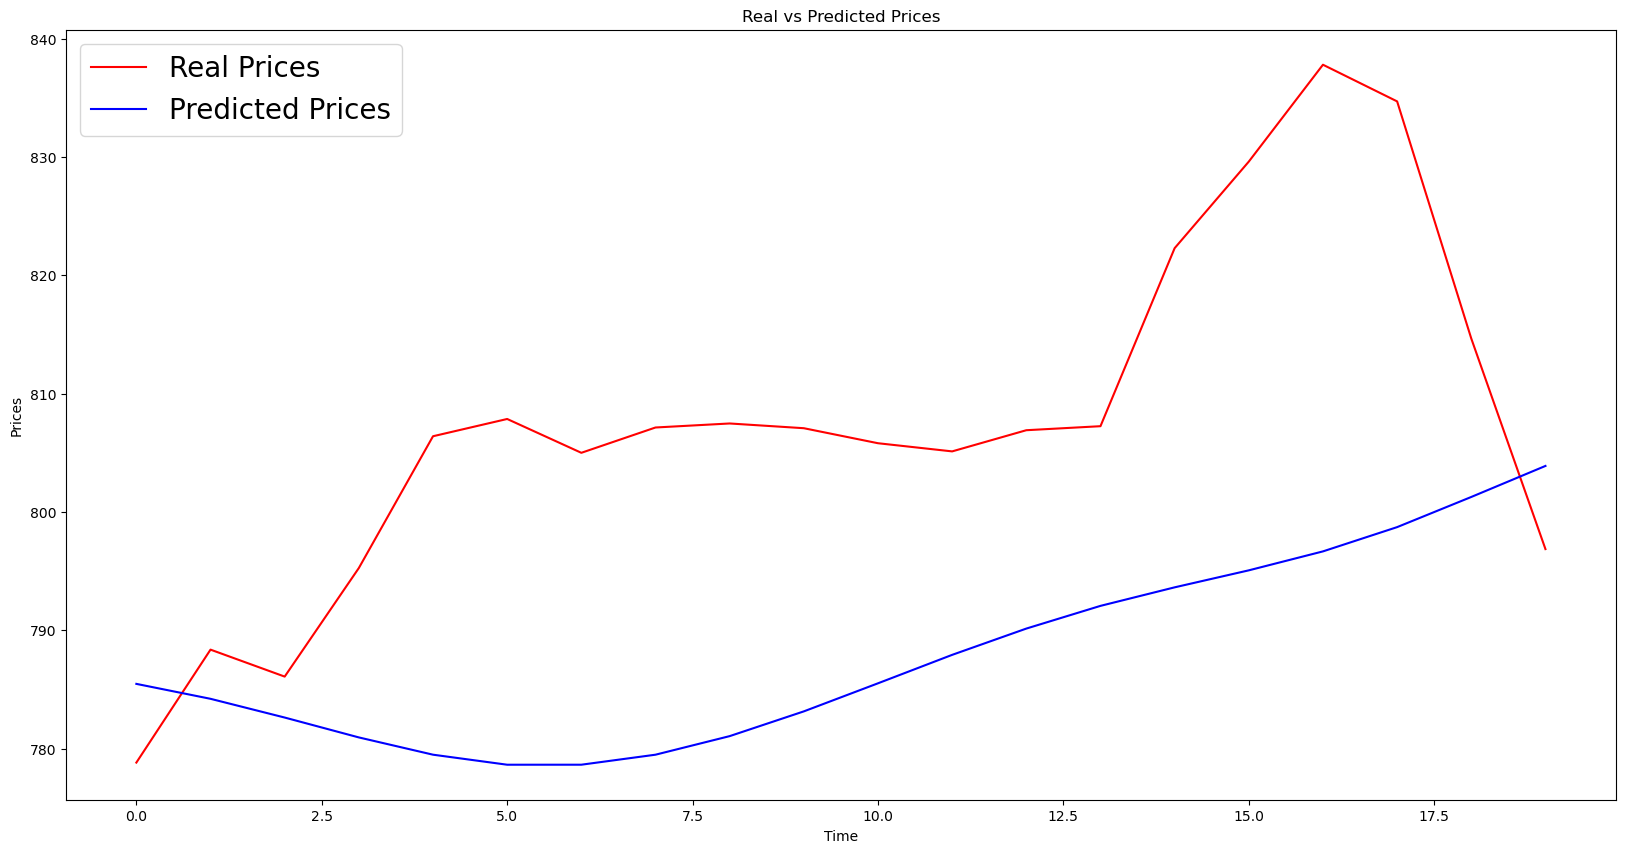

In [23]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)
